# Primeiro trabalho

## Exercícios 

### 1 - ??

### 2 - ??

### 6 - Gere dois conjuntos de pontos em duas dimensões usando o código a seguir:

```python
from sklearn import datasets
import matplotlib.pyplot as plt

n_samples = 1000
data  = datasets.make_moons(n_samples = n_samples, noise = .05)

X = data[0]
y = data[1]

plt.figure(figsize=(6, 4))
plt.scatter(X[:, 0], X[:, 1], c = y, cmap="viridis", s=50, alpha=0.7)
plt.show()
```

Compare os classificadores Naive Bayes, k-vizinhos mais próximos e regressão logística variando o nível de ruído(noise) no intervalo $[0,1]$.  No caso do algoritmo k-vizinho, use o método `selection.GridSearchCV` da biblioteca `sciki-learn` para determinar a melhor medida de distância e o valor de $k$.

In [80]:
from sklearn import datasets
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import numpy as np

plt.style.use("ggplot")

In [16]:
def generate_sample(noise, n_samples = 1000):
    data  = datasets.make_moons(n_samples = n_samples, noise = noise)

    X = data[0]
    y = data[1]

    return X, y

In [7]:
noise_vals = np.arange(0, 1, 0.05)

noise_vals

array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
       0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95])

In [81]:
acc_nb = []
acc_knn = []
acc_lr = []

knn_params = {
    "n_neighbors": [1, 3, 5, 11, 19],
    "metric": ["euclidean", "manhattan"]
}

for noise in noise_vals:
    X, y = generate_sample(noise)

    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.3, random_state = 42)

    # Aplica Naive Bayes
    nb_model = GaussianNB()
    nb_model.fit(X_train, y_train)

    nb_score = accuracy_score(nb_model.predict(X_test), y_test)

    acc_nb.append(nb_score)

    # Aplica o método KNN
    knn_grid = GridSearchCV(KNeighborsClassifier(), knn_params, "accuracy", verbose = 0, cv = 3, n_jobs = 1)
    knn_results = knn_grid.fit(X_train, y_train)

    best_estimator = knn_results.best_estimator_
    metric = best_estimator.metric
    k = best_estimator.n_neighbors

    knn_model = KNeighborsClassifier(n_neighbors = k, metric = metric)
    knn_model.fit(X_train, y_train)

    knn_score = accuracy_score(knn_model.predict(X_test), y_test)

    acc_knn.append(knn_score)

    # Aplica a regressão logística
    lr_model = LogisticRegression(solver = 'lbfgs', multi_class = 'auto', max_iter = 1000)
    lr_model.fit(X_train, y_train)

    lr_score = accuracy_score(lr_model.predict(X_test), y_test)

    acc_lr.append(lr_score)

    # Mostra o gráfico dos pontos
    #plt.scatter(X[:, 0], X[:, 1], c = y, cmap = "viridis", s = 50, alpha = 0.7)

    #plt.title("Noise: {:.2f}".format(noise))

    #plt.show()

    

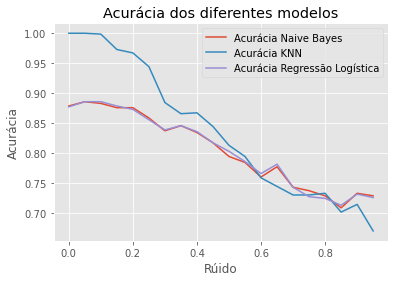

In [82]:
# Gráfico com acurácia dos modelos

plt.plot(noise_vals, acc_nb, label = "Acurácia Naive Bayes")
plt.plot(noise_vals, acc_knn, label = "Acurácia KNN")
plt.plot(noise_vals, acc_lr, label = "Acurácia Regressão Logística")

plt.title("Acurácia dos diferentes modelos")
plt.legend()

plt.xlabel("Rúido")
plt.ylabel("Acurácia")

plt.show()